### Using new case numbers to predict number of healthcare workers infected on same day.

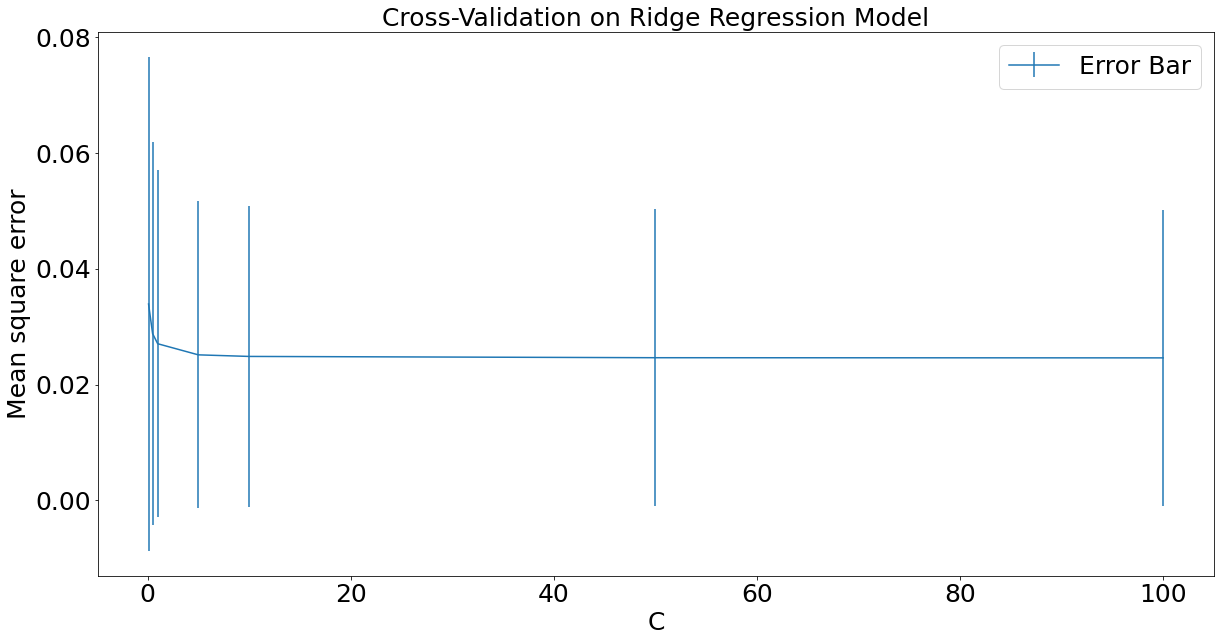

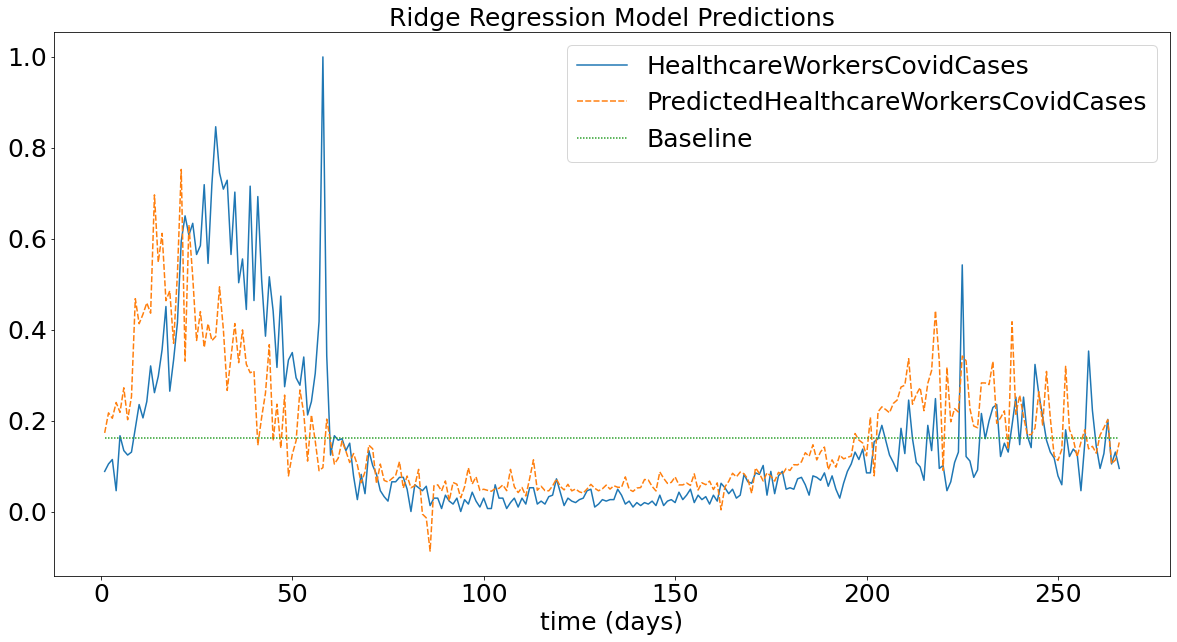

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def normalise(df):
    return (df - df.min()) / (df.max() - df.min())

df = pd.read_csv("data/new_daily_cases.csv")
df = df.drop([0])
df = normalise(df)

X = np.column_stack((np.array(df['ConfirmedCovidCases']), np.array(df['HospitalisedCovidCases']), np.array(df['RequiringICUCovidCases'])))
y = np.array(df['HealthcareWorkersCovidCases'])

mean_error = []; std_error = []
C_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for C in C_range:
    model = Ridge(alpha = 1/(2 * C))
    temp = []
    kf = KFold(n_splits = 5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test], ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    
fig = plt.figure(figsize=(20, 10))
plt.errorbar(C_range,mean_error,yerr=std_error)
plt.title('Cross-Validation on Ridge Regression Model', fontsize = 25)
plt.xlabel('C', fontsize = 25); plt.ylabel('Mean square error', fontsize = 25)
plt.legend(['Error Bar'], fontsize = 25)
plt.tick_params(labelsize=25)
plt.show()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

#Baseline
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(Xtrain, ytrain)
y_dummypred = dummy.predict(X)

#Ridge
#C=10 looks best from error bar
C = 10
model = Ridge(alpha = 1/(2 * C))
model.fit(Xtrain, ytrain)
y_pred = model.predict(X)

df_new2 = pd.DataFrame()
df_new2['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases']
df_new2['PredictedHealthcareWorkersCovidCases'] = y_pred
df_new2['Baseline'] = y_dummypred

fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=df_new2)
plt.title('Ridge Regression Model Predictions', fontsize = 25)
plt.legend(prop={'size': 25})
plt.xlabel('time (days)', fontsize = 25)
plt.tick_params(labelsize=25)
plt.show()

### MSE

In [3]:
#MSE
print("MSE - dummy training data:", mean_squared_error(ytrain, dummy.predict(Xtrain)))
print("MSE - dummy test data:", mean_squared_error(ytest, dummy.predict(Xtest)))

print("MSE - training data:", mean_squared_error(ytrain, model.predict(Xtrain)))
print("MSE - test data:", mean_squared_error(ytest, model.predict(Xtest)))

MSE - dummy training data: 0.03728735376346034
MSE - dummy test data: 0.021732096161116394
MSE - training data: 0.020950293971703744
MSE - test data: 0.009797178099407666


### Using new case numbers from previous n days to predict healthcare worker cases. (n=7)

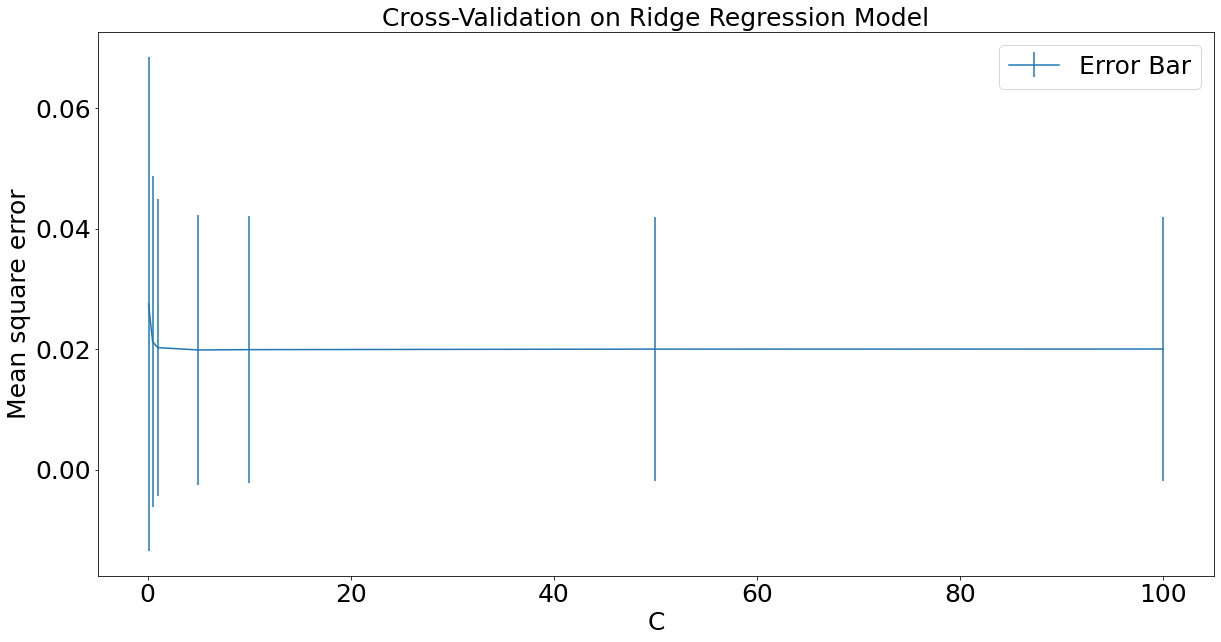

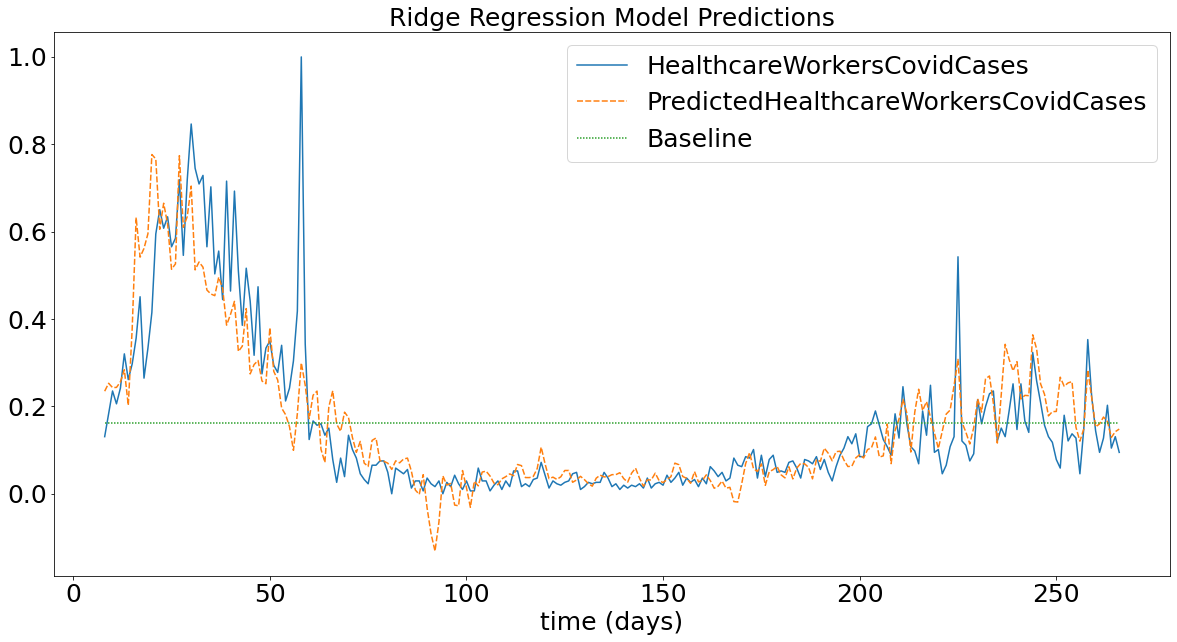

In [4]:
X2 = np.column_stack((X[:-7], X[1:-6], X[2:-5], X[3:-4], X[4:-3], X[5:-2], X[6:-1]))
y2 = y[7:]

mean_error = []; std_error = []
C_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for C in C_range:
    model = Ridge(alpha = 1/(2 * C))
    temp = []
    kf = KFold(n_splits = 5)
    for train, test in kf.split(X2):
        model.fit(X2[train], y2[train])
        ypred = model.predict(X2[test])
        temp.append(mean_squared_error(y2[test], ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    
fig = plt.figure(figsize=(20, 10))
plt.errorbar(C_range,mean_error,yerr=std_error)
plt.title('Cross-Validation on Ridge Regression Model', fontsize = 25)
plt.xlabel('C', fontsize = 25); plt.ylabel('Mean square error', fontsize = 25)
plt.legend(['Error Bar'], fontsize = 25)
plt.tick_params(labelsize=25)
plt.show()

Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y2, test_size=0.2, random_state=0)

#Baseline
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(Xtrain, ytrain)
y_dummypred = dummy.predict(X2)

#Ridge
#C=5 looks best from error bar
C = 5
model = Ridge(alpha = 1/(2 * C))
model.fit(Xtrain, ytrain)
y_pred = model.predict(X2)

df_new2 = pd.DataFrame()
df_new2['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases'][7:]
df_new2['PredictedHealthcareWorkersCovidCases'] = y_pred
df_new2['Baseline'] = y_dummypred

fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=df_new2)
plt.title('Ridge Regression Model Predictions', fontsize = 25)
plt.legend(prop={'size': 25})
plt.xlabel('time (days)', fontsize = 25)
plt.tick_params(labelsize=25)
plt.show()

### MSE

In [5]:
#MSE
print("MSE - dummy training data:", mean_squared_error(ytrain, dummy.predict(Xtrain)))
print("MSE - dummy test data:", mean_squared_error(ytest, dummy.predict(Xtest)))

print("MSE - training data:", mean_squared_error(ytrain, model.predict(Xtrain)))
print("MSE - test data:", mean_squared_error(ytest, model.predict(Xtest)))

MSE - dummy training data: 0.03782700137549466
MSE - dummy test data: 0.02354632300042348
MSE - training data: 0.009084740905491964
MSE - test data: 0.00756861398114792
